In [2]:
import numpy as np
from scipy.io import loadmat
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
import keras
from keras.models import model_from_json, Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D, Input, UpSampling2D
#from keras.utils.training_utils import multi_gpu_model
import os
import tensorflow as tf
from keras.models import model_from_json
import sys
import pandas as pd
import seaborn as sns

from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

In [ ]:
abi_and = np.load('abi_and.npy')
abi_or = np.load('abi_or.npy')
abi_uuu = np.load('abi_uuu.npy')
abi_cth = np.load('abi_cth.npy')
abi_vvv = np.load('abi_vvv.npy')
abi_cwp = np.load('abi_cwp.npy')
co_2d = np.load('co_2d.npy')
dtg = np.load('dtg.npy')
no_miss = np.load('no_na.npy')

#co_2d[:,[6],:][co_2d[:,[6],:] == -1] = 0

abi_and = abi_and[:,no_miss]
abi_or = abi_or[:,:,no_miss]
abi_uuu = abi_uuu[:,:,no_miss]
abi_cth = abi_cth[:,:,no_miss]
abi_vvv = abi_vvv[:,:,no_miss]
abi_cwp = abi_cwp[:,:,no_miss]
co_2d = co_2d[:,:,no_miss]
dtg = dtg[no_miss]

print('read files')

abi_or = np.concatenate((abi_or,co_2d[:,[4],:],abi_and.reshape(abi_and.shape[0],1,abi_and.shape[1])),axis =1)
abi_cwp = np.concatenate((abi_cwp,co_2d[:,[5],:]),axis =1)
abi_cth = np.concatenate((abi_cth,co_2d[:,[6],:]),axis =1)
abi_uuu = np.concatenate((abi_uuu,co_2d[:,[7],:]),axis =1)
abi_vvv = np.concatenate((abi_vvv,co_2d[:,[8],:]),axis =1)

abi_cth[abi_cth==-1] = 0

def normalize(a):
    z_max = np.max(a)
    z_min = np.min(a)
    return ((a-z_min)/(z_max-z_min))
    
XY = np.concatenate((normalize(abi_vvv),normalize(abi_uuu),normalize(abi_cth),normalize(abi_cwp),normalize(abi_or)),axis=1)

read files


In [ ]:
train = int(len(no_miss) * .75)
XY = np.swapaxes(XY,2,1)
XY = XY.reshape(XY.shape[0]*XY.shape[1],XY.shape[2])
from sklearn.preprocessing import normalize
XY = normalize(XY)
XY = np.swapaxes(XY.reshape(74482,290,XY.shape[1]),2,1)

In [ ]:
set_train = XY[:,:,:train]
set_test = XY[:,:,train:]

set_train = np.swapaxes(set_train,2,1)
set_train = set_train.reshape(set_train.shape[0]*set_train.shape[1],set_train.shape[2])
#set_train.shape
set_test = np.swapaxes(set_test,2,1)
set_test = set_test.reshape(set_test.shape[0]*set_test.shape[1],set_test.shape[2])

train_X = set_train[:,:-1]
test_X = set_test[:,:-1]
test_y = set_test[:,-1:]
train_y = set_train[:,-1:]

In [5]:
input = Input(shape=(40,))

x = Dense(64, activation='relu')(input)
x = Dense(32, activation='relu')(x)
x = Dense(16, activation='relu')(x)
x = Dense(8, activation='relu')(x)

encoded = Dense(2, activation='relu')(x)

x = Dense(8, activation='relu')(encoded)
x = Dense(16, activation='relu')(x)
x = Dense(32, activation='relu')(x)
x = Dense(64, activation='relu')(x)


decoded = Dense(40, activation='linear')(x)

autoencoder = Model(input, decoded)

In [6]:
autoencoder.compile(optimizer='adam', loss = 'mean_squared_error')

autoencoder_train = autoencoder.fit(train_X,train_X,epochs=30,batch_size=512,shuffle=False)

Epoch 1/30
16162594/16162594 [==============================] - 60s 4us/step - loss: 7.1582e-04
Epoch 2/30
16162594/16162594 [==============================] - 59s 4us/step - loss: 6.3007e-04
Epoch 3/30
16162594/16162594 [==============================] - 61s 4us/step - loss: 6.1064e-04
Epoch 4/30
16162594/16162594 [==============================] - 61s 4us/step - loss: 6.1697e-04
Epoch 5/30
16162594/16162594 [==============================] - 59s 4us/step - loss: 6.2698e-04
Epoch 6/30
16162594/16162594 [==============================] - 64s 4us/step - loss: 6.0384e-04
Epoch 7/30
16162594/16162594 [==============================] - 62s 4us/step - loss: 5.9607e-04
Epoch 8/30
16162594/16162594 [==============================] - 64s 4us/step - loss: 6.0925e-04
Epoch 9/30
16162594/16162594 [==============================] - 67s 4us/step - loss: 6.0140e-04
Epoch 10/30
16162594/16162594 [==============================] - 66s 4us/step - loss: 6.1549e-04
Epoch 11/30
16162594/16162594 [========

C:\Users\sbstudent\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (5.433248). Check your callbacks.
  % delta_t_median)
C:\Users\sbstudent\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (5.433248). Check your callbacks.
  % delta_t_median)
C:\Users\sbstudent\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (5.433248). Check your callbacks.
  % delta_t_median)
C:\Users\sbstudent\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (5.433248). Check your callbacks.
  % delta_t_median)
C:\Users\sbstudent\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method o

16162594/16162594 [==============================] - 381s 24us/step - loss: 5.7653e-04
Epoch 14/30
16162594/16162594 [==============================] - 68s 4us/step - loss: 5.7248e-04
Epoch 15/30
16162594/16162594 [==============================] - 57s 4us/step - loss: 5.6717e-04
Epoch 16/30
16162594/16162594 [==============================] - 60s 4us/step - loss: 5.8147e-04
Epoch 17/30
16162594/16162594 [==============================] - 59s 4us/step - loss: 6.1062e-04
Epoch 18/30
16162594/16162594 [==============================] - 60s 4us/step - loss: 6.7489e-04
Epoch 19/30
16162594/16162594 [==============================] - 59s 4us/step - loss: 6.6626e-04
Epoch 20/30
16162594/16162594 [==============================] - 60s 4us/step - loss: 6.3730e-04
Epoch 21/30
16162594/16162594 [==============================] - 62s 4us/step - loss: 6.1717e-04
Epoch 22/30
16162594/16162594 [==============================] - 60s 4us/step - loss: 6.7780e-04
Epoch 23/30
16162594/16162594 [=========

In [7]:
encoder = Model(inputs = input, outputs = encoded)
encoded_input = Input(shape = (2, ))

In [8]:
encoded_train = pd.DataFrame(encoder.predict(train_X))
encoded_train = encoded_train.add_prefix('feature_')

encoded_test = pd.DataFrame(encoder.predict(test_X))
encoded_test = encoded_test.add_prefix('feature_')

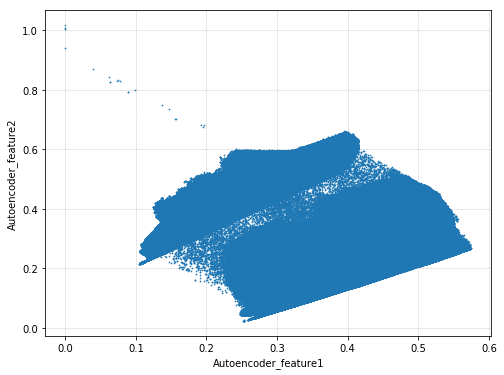

In [9]:
plt.figure(figsize=(8,6))
plt.plot(encoded_train.feature_1,encoded_train.feature_0, linestyle='', marker='o', markersize=0.7)
plt.xlabel('Autoencoder_feature1')
plt.ylabel('Autoencoder_feature2')
plt.grid(True, lw = 0.5, ls = '--', c = '.75')

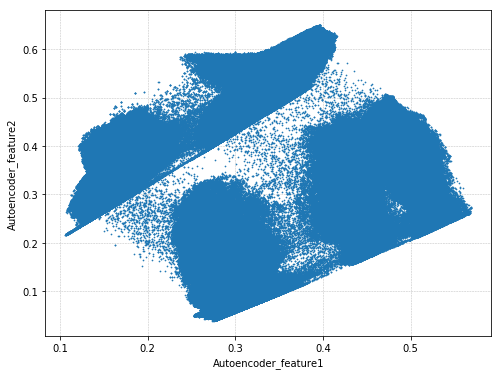

In [12]:
plt.figure(figsize=(8,6))
plt.plot(encoded_test.feature_1,encoded_test.feature_0, linestyle='', marker='o', markersize=0.7)
plt.xlabel('Autoencoder_feature1')
plt.ylabel('Autoencoder_feature2')
plt.grid(True, lw = 0.5, ls = '--', c = '.75')

In [ ]:
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components=4).fit(encoded_train)
labels = gmm.predict(encoded_train)
#plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')

In [ ]:
plt.scatter(encoded_train.feature_0, encoded_train.feature_1, c=labels, s=40, cmap='viridis')

In [13]:
#gmm.predict(encoded_test)
from keras.models import model_from_json
# serialize model to JSON
model_json = encoder.to_json()
with open("encoder_full.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
encoder.save_weights("encoder_full.h5")

In [14]:
from keras.models import model_from_json
# serialize model to JSON
model_json = autoencoder.to_json()
with open("autoencoder_full.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
autoencoder.save_weights("autoencoder_full.h5")

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
com = 2
pca = PCA(n_components=com)
k=list(range(com))
pca.fit(train_X)

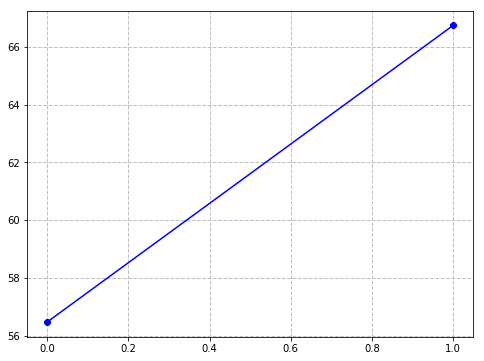

In [29]:
var= pca.explained_variance_ratio_
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.figure(figsize=(8,6))
plt.plot(k,var1, "b8-")
plt.grid(True, lw = 1, ls = '--', c = '.75')

In [ ]:
pca2 = pd.DataFrame(pca.transform(train_X))
#pca2['']
pca2 = pca2.add_prefix('feature_')
#pca2['y'] 

In [ ]:
plt.figure(figsize=(8,6))
#plt.plot(pca2[0],pca2[1], linestyle='', marker='o', markersize=0.7,hue =pca2['label'] )
sns.lmplot( x= 'feature_0', y='feature_1', data=pca2, fit_reg=False, scatter_kws={"alpha":0.2,"s":3} )
 

plt.xlabel('PC-1')
plt.ylabel('PC-2')
plt.grid(True, lw = 0.5, ls = '--', c = '.75')